In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
d1 = pd.read_csv('train.csv')
dt1 = pd.read_csv('test.csv')

In [18]:
d1.loc[:,d1.isna().sum()>0].columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [30]:
a=[]
for i in d1.loc[:,d1.isna().sum()>500].columns:
    a.append(i)
print(a)
d1[a].isna().sum()

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [13]:
d1.shape, dt1.shape

((1460, 81), (1459, 80))

In [11]:
d1.loc[:,d1.isna().sum()>0].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [34]:
dt1.loc[:,dt1.isna().sum()>500].isna().sum()

Alley          1352
FireplaceQu     730
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

In [35]:
d1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
target = d1['SalePrice']
d2 = d1.copy()

In [44]:
d2 = d2.drop(['SalePrice'], axis = 1)

In [47]:
df = pd.concat([d2,dt1],axis = 0)

In [54]:
df.loc[:,df.isna().sum()>1500].columns

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [55]:
df1 = df.copy()

In [57]:
df1 = df1.drop([i for i in df1.loc[:,df.isna().sum()>1500].columns], axis = 1)

In [59]:
#knn mputing to fill the missing values for ordinals

def knn_imputing(df, na_column):
  df = df.copy()
  num_df= df.select_dtypes(np.number)
  non_na_columns = num_df.loc[:, num_df.isna().sum() == 0].columns

  y_train = num_df.loc[num_df[na_column].isna() == False, na_column]
  X_train = num_df.loc[num_df[na_column].isna() == False, non_na_columns]
  X_test = num_df.loc[num_df[na_column].isna() == True, non_na_columns]

  knn = KNeighborsRegressor()
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  df.loc[df[na_column].isna() == True, na_column] = y_pred

  return df

<AxesSubplot:>

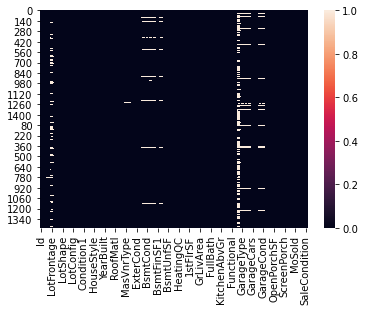

In [65]:
sns.heatmap(df1.isna())

In [93]:
o_columns = [ df1.loc[:, df1.isna().sum()>0].select_dtypes('object').columns]

In [94]:
o_columns

[Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'],
       dtype='object')]

In [67]:
df1.loc[:, df1.isna().sum()>0].isna().sum()

MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
dtype: int64

In [91]:
df1['MSZoning'].mode()[0]

'RL'

In [95]:
for i in ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']:
    df1[i]= df1[i].fillna(df1[i].mode()[0])

In [98]:
df1.loc[:,df1.isna().sum()>0].isna().sum()

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [101]:
for i in df1.loc[:,df1.isna().sum()>0].columns:
  df1[i] = df1[i].fillna(df1[i].median())

In [106]:
df1.shape

(2919, 76)

In [137]:
df2 = df1.copy()

In [138]:
df2.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [139]:
df2['MSSubClass'] = df2['MSSubClass'].astype('object')
df2['YearBuilt']=df2['YearBuilt'].astype('object')
df2['YearRemodAdd']=df2['YearRemodAdd'].astype('object')
df2['MoSold']=df2['MoSold'].astype('object')
df2['YrSold']=df2['YrSold'].astype('object')
df2['MasVnrArea']=df2['MasVnrArea'].astype('float64')
df2['GarageYrBlt']=df2['GarageYrBlt'].astype('object')

In [121]:
df2.select_dtypes('object').columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

<AxesSubplot:>

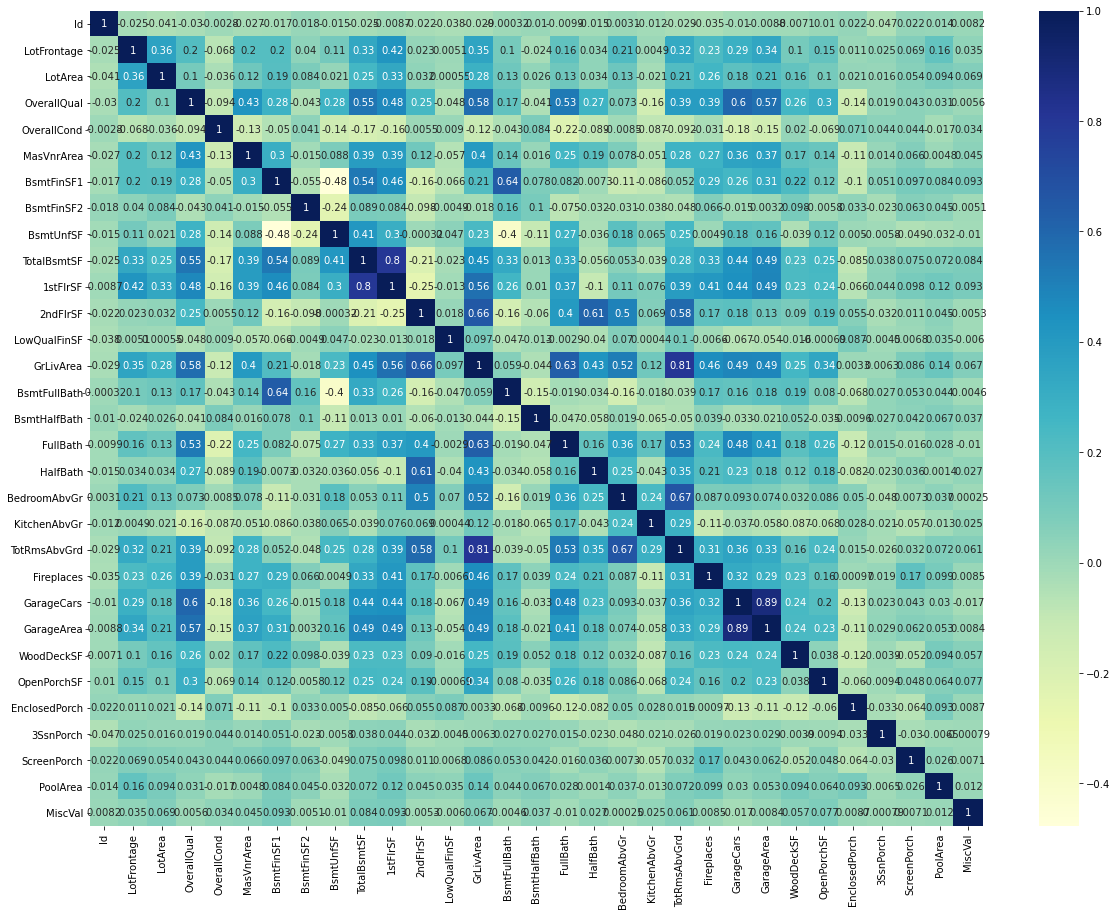

In [140]:
plt.figure(figsize = (20,15))
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

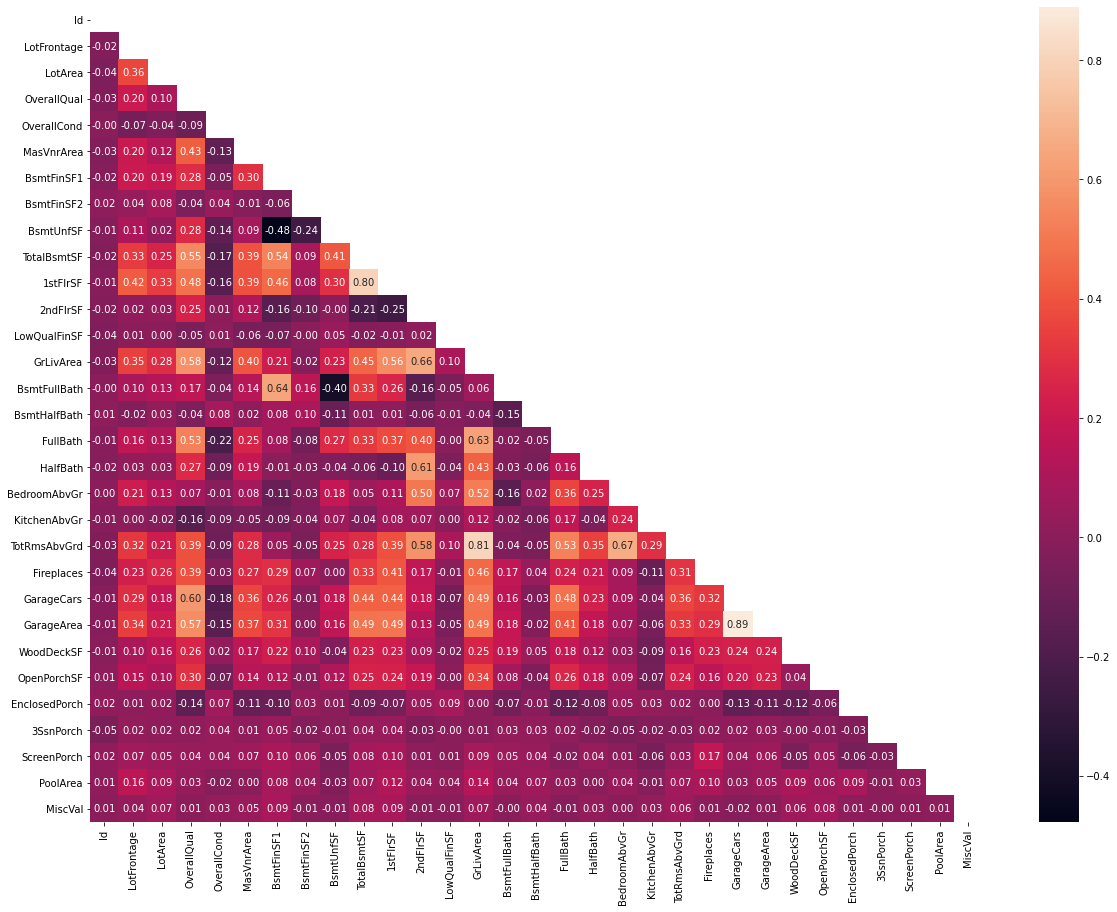

In [142]:
plt.figure(figsize = (20,15))
matrix=np.triu((df2[num_cols]).corr())
sns.heatmap((df2[num_cols]).corr(),annot=True,fmt='.2f',mask=matrix) 
plt.show()

89% correlation between GarageCars and GarageArea.

81% correlation between TotRmsAbvGrd and GrLivArea.

80% correlation between 1stFlrSF and TotalBsmtSF

79% correlation between GarageYrBlt and YearBuilt

a) Based on above we will remove the features: GarageYrBlt, TotRmsAbvGrd, GarageCars, 1stFlrSF

b) Also, BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF. Hence we will remove the BsmtFinSF1,2 and BsmtUnfSF

c) GarageYrBlt can also be removed as it is mostly same of very close to YearBuilt.

In [157]:
df2.drop(df2[['GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars', '1stFlrSF','GarageYrBlt',
                        'TotRmsAbvGrd','GarageCars','1stFlrSF','BsmtFinSF1', 'BsmtFinSF2', 
                        'BsmtUnfSF']],axis=1, inplace=True)

KeyError: "['GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars', '1stFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'] not in index"

In [163]:
df2 = df2.drop(['Id'], axis = 1)

In [164]:
num_cols = [f for f in df2.columns if df2.dtypes[f] != 'object']
cat_cols = [f for f in df2.columns if df2.dtypes[f] == 'object']

In [165]:
df2.shape

(2919, 68)

In [166]:
num_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

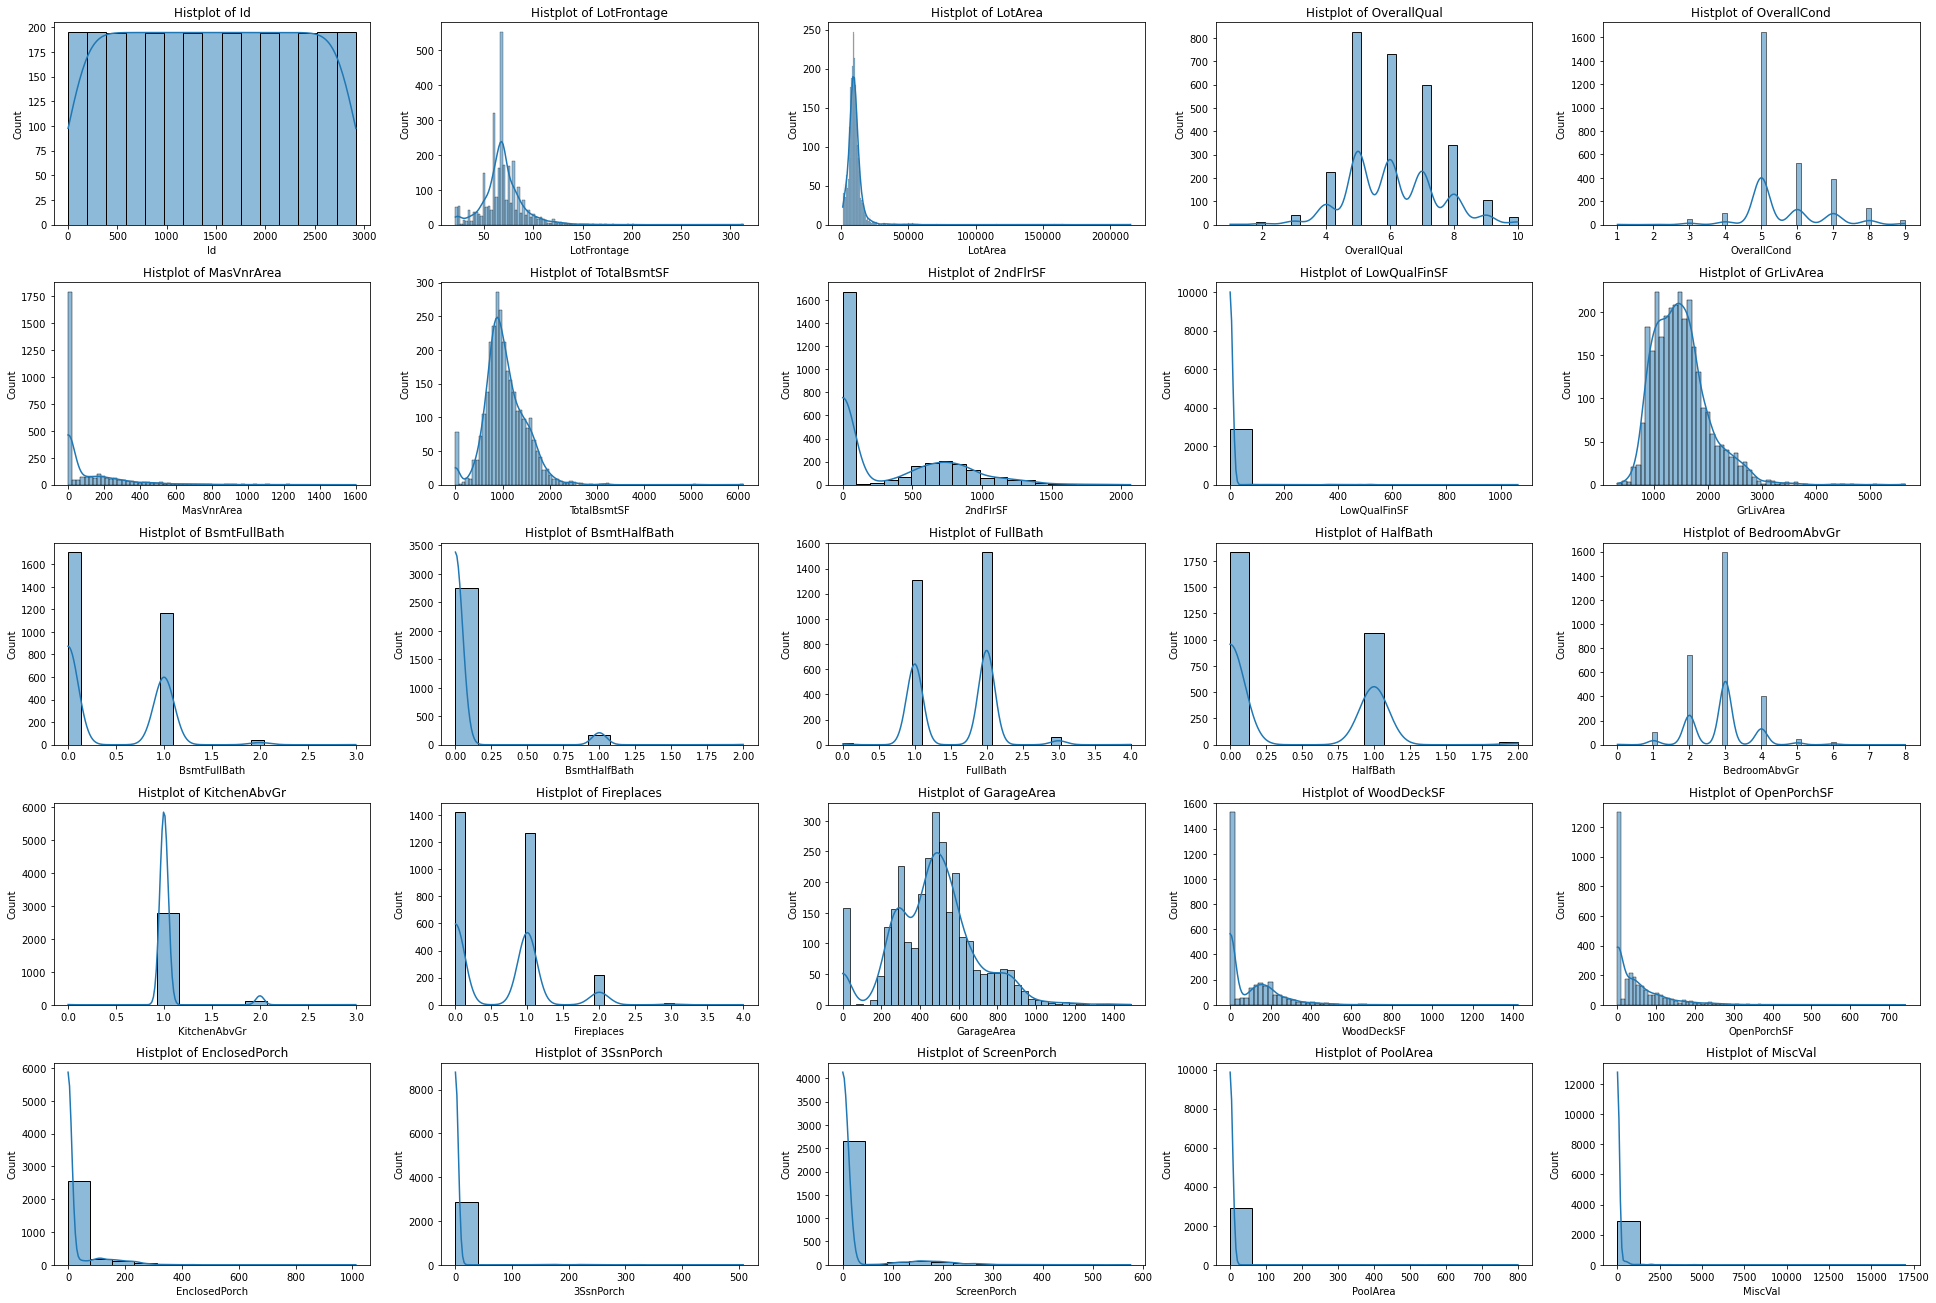

In [154]:
plt.figure(figsize = (27,25))

for i in range(len(num_cols)):
    plt.subplot(7, 5, i + 1)  # 6 Rows , 5 cols (=30 ; required 22 plots as len(num_col=22))
    sns.histplot(data= df2,x = df2[num_cols[i]],kde=True)
    plt.title('Histplot of {}'.format(num_cols[i]))
    plt.tight_layout()

#Most of the features are skewed highly, logarithm treating for skewness


In [174]:
#finding the skewness
import scipy.stats
scipy.stats.skew(df2[num_cols])

array([ 1.67485156, 12.8224314 ,  0.19711045,  0.57031205,  2.61359213,
        1.16261612,  0.86167475, 12.088761  ,  1.26935769,  0.62483211,
        3.93159384,  0.16760573,  0.69456649,  0.32632435,  4.30225437,
        0.7334946 ,  0.24118365,  1.84243281,  2.53511373,  4.00389122,
       11.37606468,  3.9466937 , 16.89832792, 21.94719481])

In [177]:
df_skew = pd.DataFrame(num_cols, columns=['features_n'])

In [185]:
df_skew['Skewness'] = df_skew['features_n'].apply(lambda a: scipy.stats.skew(df2[a]))
df_skew['skewed'] = df_skew['Absolute_Skew'].apply(lambda x: True if x>=0.5 else False)

In [186]:
df_skew

,features_n,Skewness,Absolute_Skew,skewed
0,LotFrontage,1.674852,1.674852,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,MasVnrArea,2.613592,2.613592,True
5,TotalBsmtSF,1.162616,1.162616,True
6,2ndFlrSF,0.861675,0.861675,True
7,LowQualFinSF,12.088761,12.088761,True
8,GrLivArea,1.269358,1.269358,True
9,BsmtFullBath,0.624832,0.624832,True


In [188]:
df_skew[df_skew['skewed']>0.5]['features_n']

0       LotFrontage
1           LotArea
3       OverallCond
4        MasVnrArea
5       TotalBsmtSF
6          2ndFlrSF
7      LowQualFinSF
8         GrLivArea
9      BsmtFullBath
10     BsmtHalfBath
12         HalfBath
14     KitchenAbvGr
15       Fireplaces
17       WoodDeckSF
18      OpenPorchSF
19    EnclosedPorch
20        3SsnPorch
21      ScreenPorch
22         PoolArea
23          MiscVal
Name: features_n, dtype: object

In [189]:
skewd = []
for i in df_skew[df_skew['skewed']>0.5]['features_n']:
    df_skew['log_skewd'] = skewd.append(i)
    

In [190]:
skewd

['LotFrontage',
 'LotArea',
 'OverallCond',
 'MasVnrArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [191]:
df4 = df2.copy()

In [193]:
for i in skewd:
    df4[i] = np.log1p(df4[i])

In [204]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   float64
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   float64
 17  YearBuilt      2919 non-null   object 
 18  YearRemo

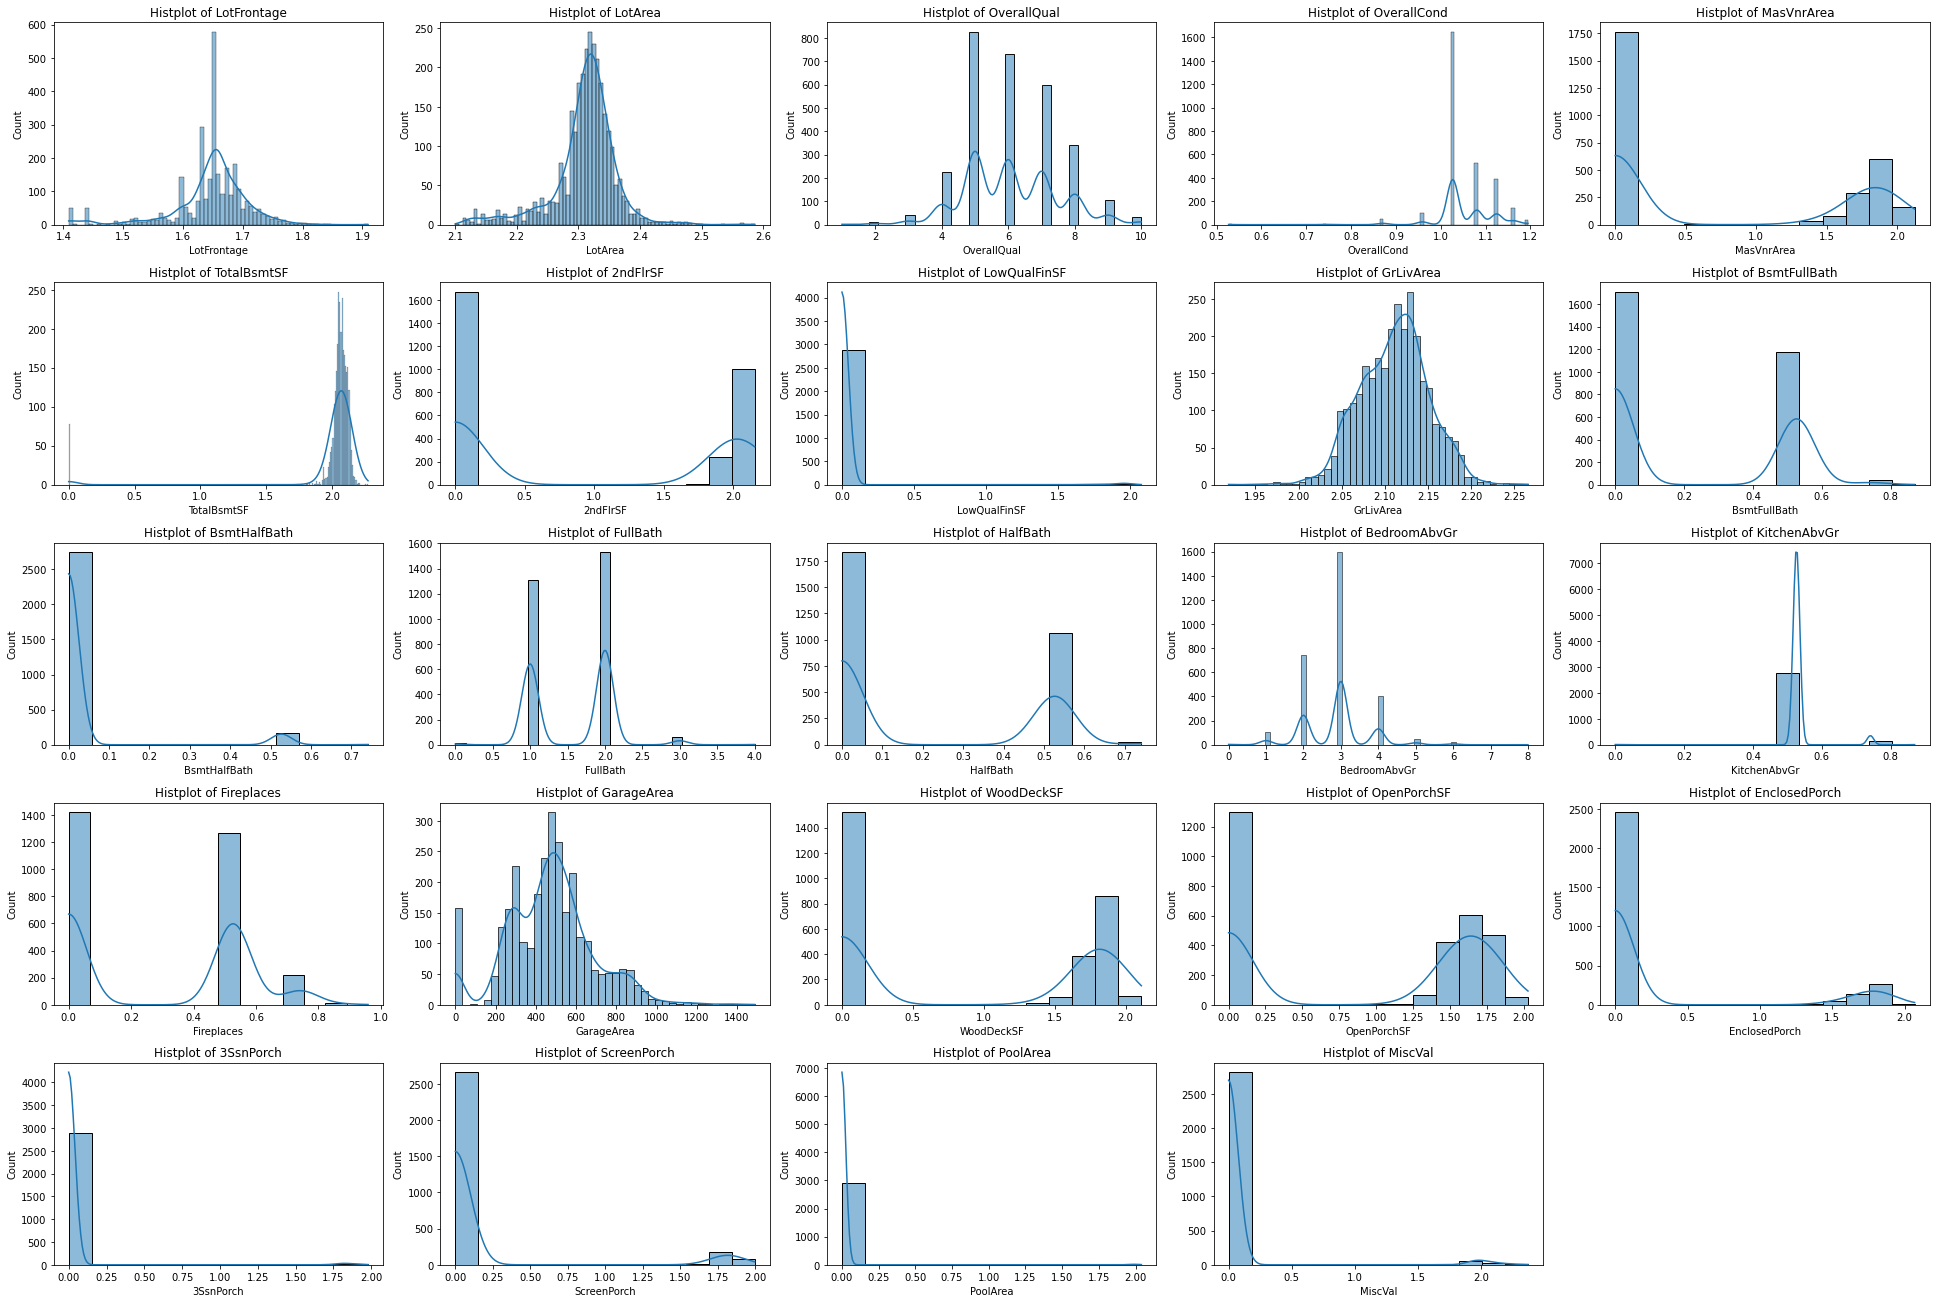

In [194]:
plt.figure(figsize = (27,25))

for i in range(len(num_cols)):
    plt.subplot(7, 5, i + 1)  # 6 Rows , 5 cols (=30 ; required 22 plots as len(num_col=22))
    sns.histplot(data= df4,x = df4[num_cols[i]],kde=True)
    plt.title('Histplot of {}'.format(num_cols[i]))
    plt.tight_layout()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

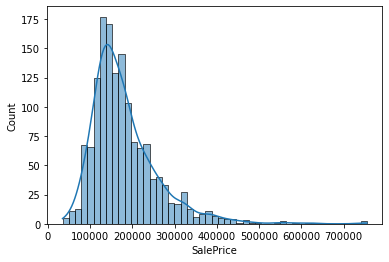

In [198]:
sns.histplot(target, kde =True)

C:\Users\achyuth.v\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\achyuth.v\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

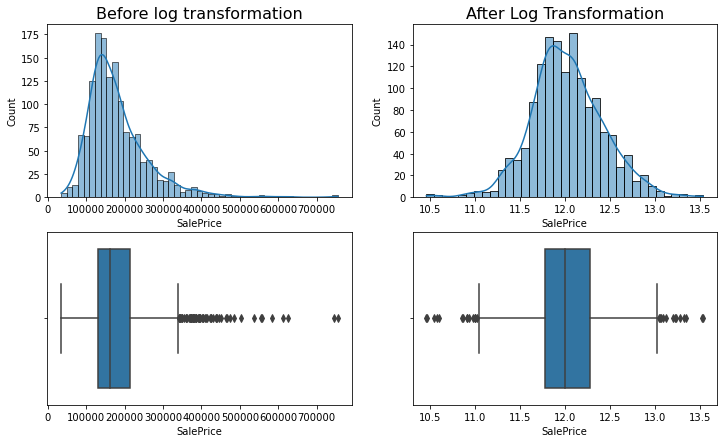

In [201]:

plt.figure(figsize = (12,7))

plt.subplot(221)
plot1=sns.histplot(target, kde=True);
plot1.set_title('Before log transformation', fontsize=16)

plt.subplot(222)
plot2=sns.histplot(np.log(target), kde=True);
plot2.set_title('After Log Transformation', fontsize=16)

plt.subplot(223)
sns.boxplot(target)

plt.subplot(224)
sns.boxplot(np.log(target))

In [202]:
target_log = np.log(target)

In [205]:
from scipy.stats import skew
df4[num_cols].skew()

LotFrontage      -1.380216
LotArea          -0.893911
OverallQual       0.197212
OverallCond      -1.691232
MasVnrArea        0.454676
TotalBsmtSF      -5.690257
2ndFlrSF          0.292030
LowQualFinSF      8.414667
GrLivArea        -0.118123
BsmtFullBath      0.380569
BsmtHalfBath      3.739771
FullBath          0.167692
HalfBath          0.553848
BedroomAbvGr      0.326492
KitchenAbvGr      2.243372
Fireplaces        0.090435
GarageArea        0.241308
WoodDeckSF        0.105023
OpenPorchSF      -0.176280
EnclosedPorch     1.904119
3SsnPorch         8.746268
ScreenPorch       2.923425
PoolArea         14.917125
MiscVal           5.068693
dtype: float64

In [206]:
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [208]:
df4_dummy = pd.get_dummies(df4, columns = ['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition'], drop_first = True)

C:\Users\achyuth.v\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [209]:
col_dummys = df4_dummy.columns.tolist()

In [210]:
col_dummys

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighbor

In [211]:
df4_dummy.shape

(2919, 431)

In [218]:
x_train = df4_dummy.loc[:1459,:]
y_train = target_log
x_test = df4_dummy.loc[1459:, :]

In [219]:
x_train.shape, x_test.shape, y_train.shape

((1460, 431), (1460, 431), (1460,))

In [311]:
#model Making ----- LinearRegression
from sklearn.linear_model import LinearRegression
m_lr = LinearRegression()
m_lr.fit(x_train, y_train)

LinearRegression()

In [312]:
m_lr.score(x_train, y_train)

0.9523697329377447

In [223]:
import sklearn.metrics as metrics

In [224]:
y_train_predict = m_lr.fit(x_train, y_train).predict(x_train)

In [225]:
np.sqrt(metrics.mean_squared_error(y_train, y_predict))

0.08714795150768179

In [226]:
y_test_predict = m_lr.fit(x_train, y_train).predict(x_test)

In [227]:
y_hpp = np.exp(y_test_predict)

In [228]:
y_hpp

array([138782.5260276 , 131245.9619009 , 141984.99259371, ...,
       173970.84412457, 115017.96083982, 204223.50027265])

In [231]:
x_test = x_test.reindex(columns = col_dummys).fillna(0)

In [240]:
x_test.reset_index(inplace = True, drop = True)

In [242]:
x_test=x_test.drop(['index'], axis = 1)

In [243]:
x_test

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.673489,2.322792,5,1.080418,0.000000,2.096358,0.000000,0.0,2.096358,0.526589,...,0,0,0,0,1,0,0,0,1,0
1,1.685370,2.338024,5,1.080418,0.000000,2.051984,0.000000,0.0,2.054003,0.000000,...,0,0,0,0,1,0,0,0,1,0
2,1.687642,2.357620,6,1.080418,1.738947,2.103272,0.000000,0.0,2.103272,0.000000,...,0,0,0,0,1,0,0,0,1,0
3,1.671001,2.354672,5,1.026672,0.000000,2.058487,2.022068,0.0,2.127795,0.000000,...,0,0,0,0,1,0,0,0,1,0
4,1.680725,2.323195,6,1.080418,1.397363,2.058212,2.017649,0.0,2.125953,0.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.408800,2.148139,4,1.124748,0.000000,1.988484,1.988484,0.0,2.079027,0.000000,...,0,0,0,0,1,0,0,0,1,0
1456,1.408800,2.145577,4,1.026672,0.000000,1.988484,1.988484,0.0,2.079027,0.000000,...,0,0,0,0,1,0,0,0,0,0
1457,1.805236,2.389087,5,1.124748,0.000000,2.093184,0.000000,0.0,2.093184,0.526589,...,0,0,0,0,1,0,0,0,0,0
1458,1.637663,2.327628,5,1.026672,0.000000,2.056267,0.000000,0.0,2.064116,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [244]:
x_test.reset_index(inplace = True)

In [245]:
x_test

,index,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1.673489,2.322792,5,1.080418,0.000000,2.096358,0.000000,0.0,2.096358,...,0,0,0,0,1,0,0,0,1,0
1,1,1.685370,2.338024,5,1.080418,0.000000,2.051984,0.000000,0.0,2.054003,...,0,0,0,0,1,0,0,0,1,0
2,2,1.687642,2.357620,6,1.080418,1.738947,2.103272,0.000000,0.0,2.103272,...,0,0,0,0,1,0,0,0,1,0
3,3,1.671001,2.354672,5,1.026672,0.000000,2.058487,2.022068,0.0,2.127795,...,0,0,0,0,1,0,0,0,1,0
4,4,1.680725,2.323195,6,1.080418,1.397363,2.058212,2.017649,0.0,2.125953,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1.408800,2.148139,4,1.124748,0.000000,1.988484,1.988484,0.0,2.079027,...,0,0,0,0,1,0,0,0,1,0
1456,1456,1.408800,2.145577,4,1.026672,0.000000,1.988484,1.988484,0.0,2.079027,...,0,0,0,0,1,0,0,0,0,0
1457,1457,1.805236,2.389087,5,1.124748,0.000000,2.093184,0.000000,0.0,2.093184,...,0,0,0,0,1,0,0,0,0,0
1458,1458,1.637663,2.327628,5,1.026672,0.000000,2.056267,0.000000,0.0,2.064116,...,0,0,0,0,1,0,0,0,1,0


In [264]:
final = pd.DataFrame()
final['Id'] = x_test['index'].apply(lambda a: a+1460)
final['SalePrice'] = y_hpp

In [270]:
final.to_csv('aj_saleprice_submission.csv', index = False)

In [267]:
final = final.loc[1:, :]

In [269]:
final

,Id,SalePrice
1,1461,131245.961901
2,1462,141984.992594
3,1463,180619.135179
4,1464,202705.747642
5,1465,189612.636065
...,...,...
1455,2915,87993.428534
1456,2916,80528.485524
1457,2917,173970.844125
1458,2918,115017.960840


In [ ]:
#got a public score of 0.14918 ranking 2173
#working to progress the rank and score


In [271]:
#feature Engineering 
df4.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Yr

In [274]:
df4['overall_rating'] = (df4['OverallQual'] + df4['OverallCond']) * 0.5
df4['Bsmt_bath'] = df4['BsmtFullBath'] + df4['BsmtHalfBath']
df4['Bath'] = df4['FullBath'] + df4['HalfBath']

In [277]:
df4 = df4.drop(['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','HalfBath','FullBath'], axis = 1)

In [283]:
df4['YrSold'] = df4['YrSold'].astype(int)
df4['YearBuilt'] = df4['YearBuilt'].astype(int)
df4['YearRemodAdd'] = df4['YearRemodAdd'].astype(int)

In [284]:
df4['House_age'] = df4.YrSold - df4.YearBuilt
df4['RemodAge'] = df4.YrSold - df4.YearRemodAdd

In [285]:
df4 = df4.drop(['YrSold','YearBuilt','YearRemodAdd'], axis = 1)

In [286]:
df4.shape

(2919, 64)

In [289]:
def plot_hist_box(data):
    figure, axis = plt.subplots(1,2,figsize=(15, 5))
    plt.suptitle(data.name)
    axis[0].boxplot(data)
    axis[1] = sns.distplot(data)
    axis[1].lines[0].set_color('crimson')
    rect = plt.Rectangle(
    (0, 0), 1, 1, fill=False, color="k", lw=3, transform=figure.transFigure, figure=figure)
    figure.patches.extend([rect])
    plt.show()

C:\Users\achyuth.v\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


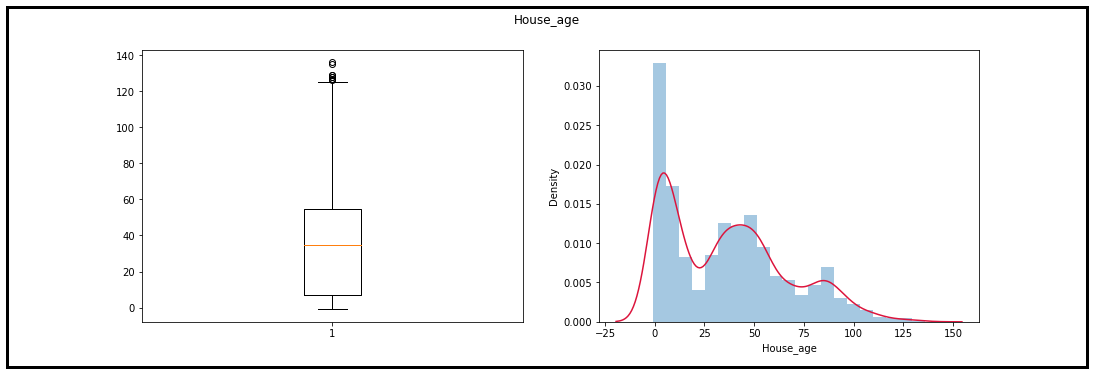

In [290]:
plot_hist_box(df4.House_age)

C:\Users\achyuth.v\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


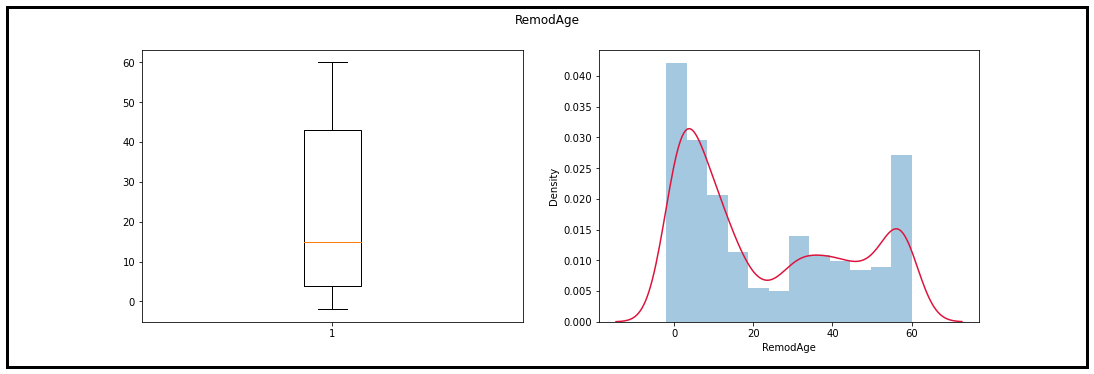

In [291]:
plot_hist_box(df4.RemodAge)

C:\Users\achyuth.v\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


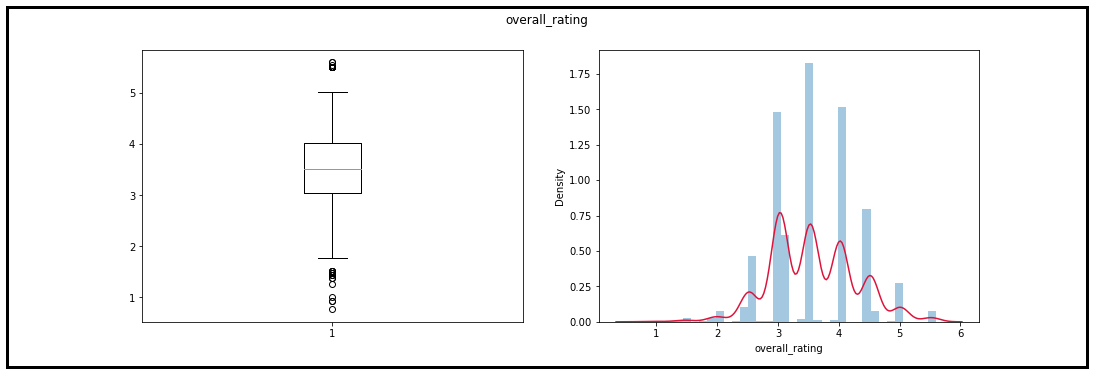

C:\Users\achyuth.v\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


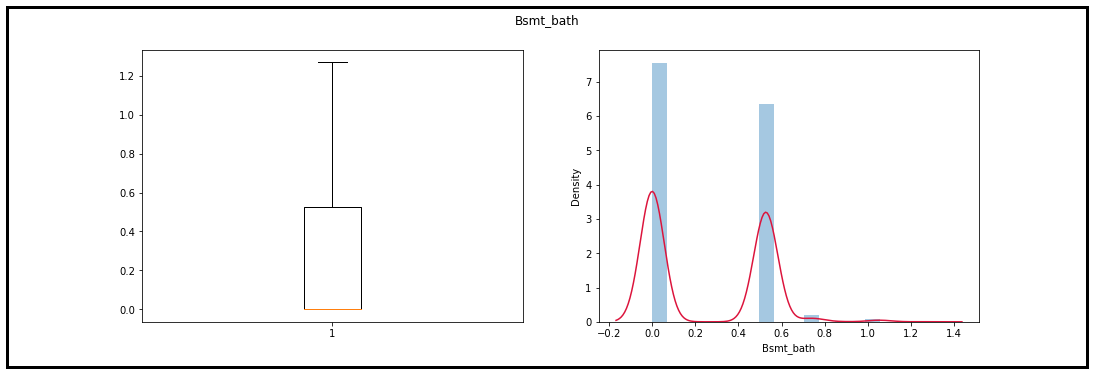

C:\Users\achyuth.v\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


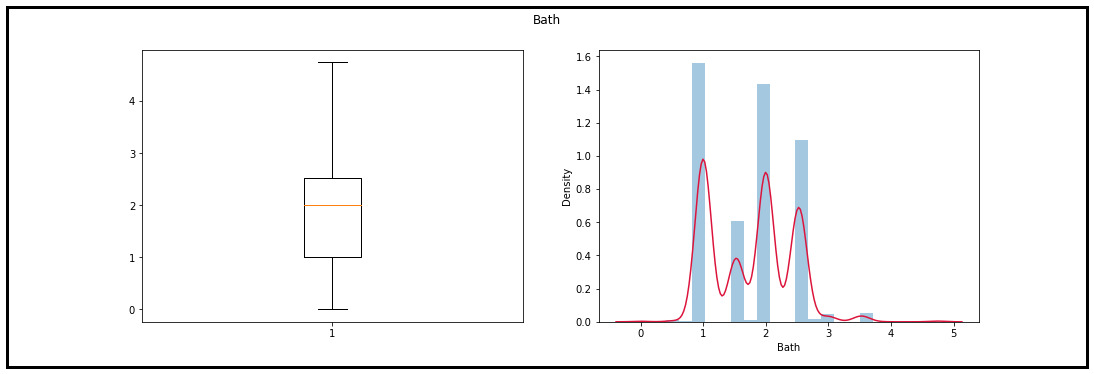

In [292]:
plot_hist_box(df4.overall_rating)
plot_hist_box(df4.Bsmt_bath)
plot_hist_box(df4.Bath)

In [295]:
num_cols_new = [f for f in df4.columns if df4.dtypes[f] != 'object']
cat_cols_new = [f for f in df4.columns if df4.dtypes[f] == 'object']

In [296]:
num_cols_new

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'overall_rating',
 'Bsmt_bath',
 'Bath',
 'House_age',
 'RemodAge']

In [298]:
new_cols = ['overall_rating','Bsmt_bath','Bath','House_age','RemodAge']

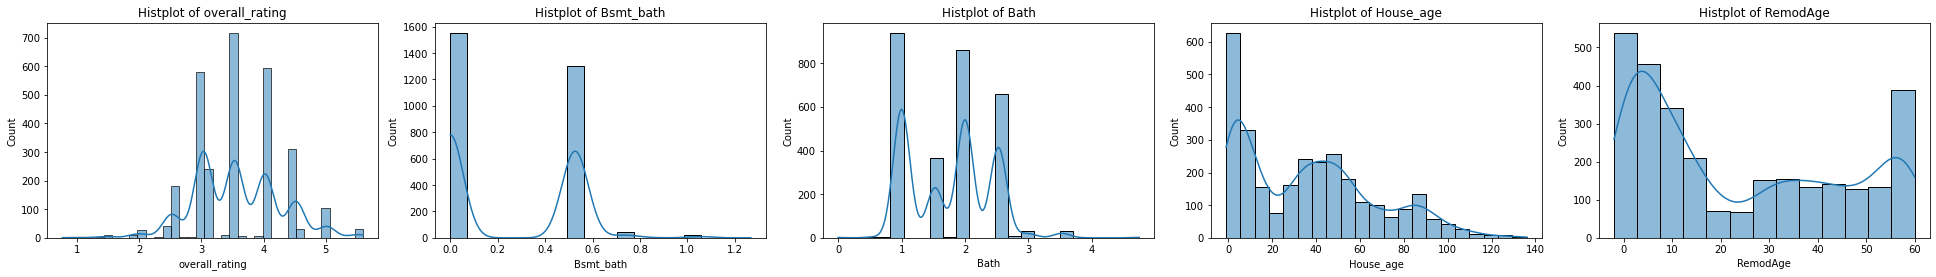

In [299]:
plt.figure(figsize = (27,25))

for i in range(len(new_cols)):
    plt.subplot(7, 5, i + 1)  # 6 Rows , 5 cols (=30 ; required 22 plots as len(num_col=22))
    sns.histplot(data= df4,x = df4[new_cols[i]],kde=True)
    plt.title('Histplot of {}'.format(new_cols[i]))
    plt.tight_layout()

In [301]:
#skewness for the latest columns
scipy.stats.skew(df4[new_cols])

array([0.14095797, 0.28404525, 0.25877725, 0.5986094 , 0.45022621])

In [ ]:
#skewness is not crossing greater than 0.5 most cases we can ignore the skew part

In [302]:
cat_cols_new

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [304]:
df5_dummy = pd.get_dummies(df4, columns = ['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'SaleType',
 'SaleCondition'], drop_first = True)

C:\Users\achyuth.v\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [305]:
col_dummys_df5 = df5_dummy.columns.tolist()

In [306]:
col_dummys_df5

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'overall_rating',
 'Bsmt_bath',
 'Bath',
 'House_age',
 'RemodAge',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighbo

<AxesSubplot:>

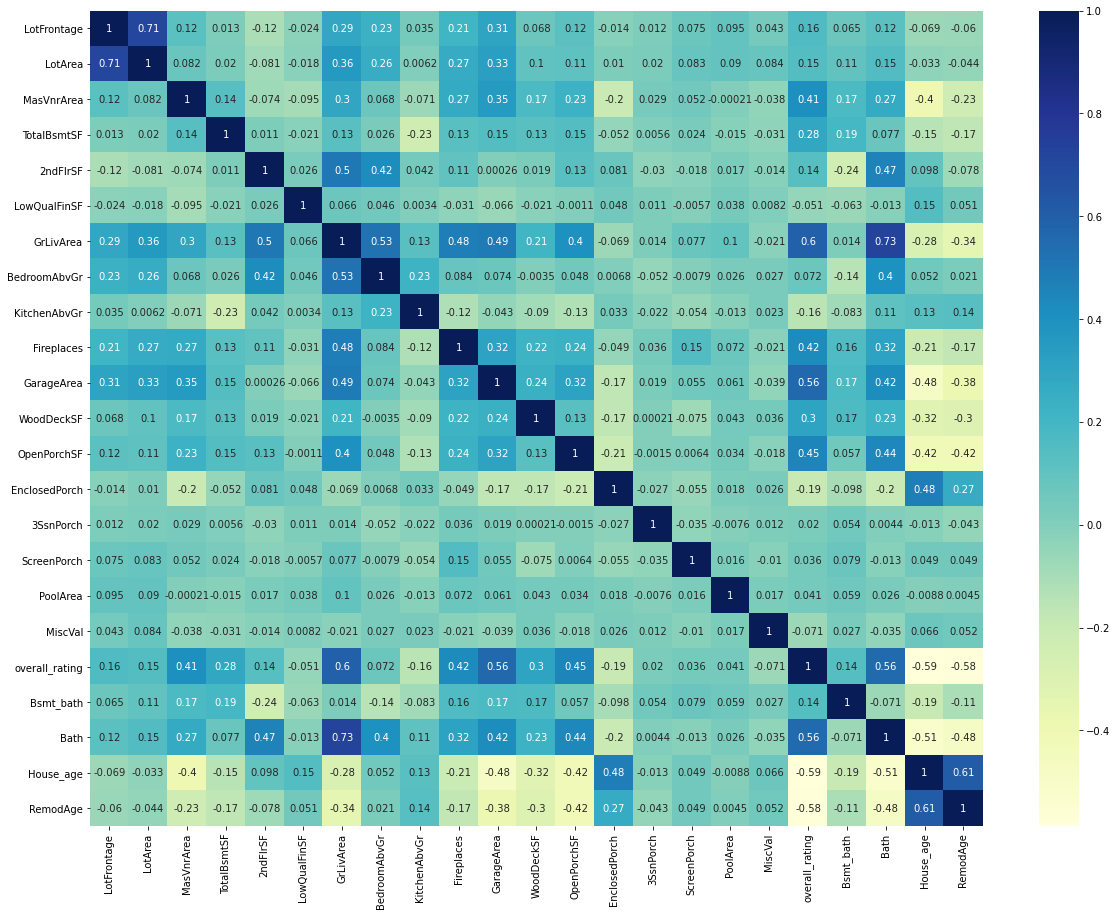

In [287]:
plt.figure(figsize = (20,15))
sns.heatmap(df4.corr(), cmap="YlGnBu", annot=True)

In [307]:
x_train_n = df5_dummy.loc[:1459,:]
y_train_n = target_log
x_test_n = df5_dummy.loc[1459:, :]

In [375]:
x_train_n.shape, y_train_n.shape, x_test_n.shape

((1460, 249), (1460,), (1460, 249))

In [313]:
#model Making ----- LinearRegression
from sklearn.linear_model import LinearRegression
m_lr_n = LinearRegression()
m_lr_n.fit(x_train_n, y_train_n)

LinearRegression()

In [314]:
m_lr_n.score(x_train_n, y_train_n)

0.9412973327054311

In [315]:
m_lr.score(x_train, y_train)

0.9523697329377447

In [385]:
x_train.shape

(1460, 431)

In [379]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_train,y_train, test_size = 0.1, random_state = 101)

In [384]:
xtrain.shape

(1314, 431)

In [380]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [381]:
scaler = StandardScaler()

In [382]:
xtrain1 = scaler.fit_transform(xtrain)
xtest1 = scaler.transform(xtest)

In [376]:
xtrain.shape

(1314, 431)

In [323]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [324]:
Base_Models = [LinearRegression(),
               KNeighborsRegressor(),
               SVR(),
               DecisionTreeRegressor(),
               RandomForestRegressor(),
               AdaBoostRegressor(), 
               GradientBoostingRegressor()]

score = []
mae = []
rmse = []

for model in Base_Models:
    models = model
    
    models.fit(xtrain,ytrain)
    y_pred = models.predict(xtest)
    
    score.append(r2_score(ytest,y_pred) * 100)
    mae.append(mean_absolute_error(ytest,y_pred))
    rmse.append(np.sqrt(mean_squared_error(ytest,y_pred)))

In [325]:
score, mae, rmse

([-1.0368341454112652e+23,
  56.94124711661664,
  79.20904190829899,
  72.92367103574236,
  86.02251629662946,
  78.95899480072586,
  88.88984309798116],
 [1032354555.2807705,
  0.19231294108600586,
  0.12683111720904633,
  0.14331617720110304,
  0.09742138501959752,
  0.13333304109905478,
  0.08980674401765285],
 [12473987551.376673,
  0.2542034171627369,
  0.1766395347859326,
  0.20157912314075593,
  0.1448322101306158,
  0.1776985575948831,
  0.12912512557427136])

In [326]:
result = {"Models":["LinearRegression","KNeighborsRegressor","SVR","DecisionTreeRegressor","RandomForestRegressor","AdaBoostRegressor","GradientBoostingRegressor"],
         "r2_score":score,
         "MAE":mae,
         "RMSE": rmse}
result = pd.DataFrame(result)
result = result.set_index("Models")

In [327]:
result

,r2_score,MAE,RMSE
Models,,,
LinearRegression,-1.036834e+23,1.032355e+09,1.247399e+10
KNeighborsRegressor,5.694125e+01,1.923129e-01,2.542034e-01
SVR,7.920904e+01,1.268311e-01,1.766395e-01
DecisionTreeRegressor,7.292367e+01,1.433162e-01,2.015791e-01
RandomForestRegressor,8.602252e+01,9.742139e-02,1.448322e-01
AdaBoostRegressor,7.895899e+01,1.333330e-01,1.776986e-01
GradientBoostingRegressor,8.888984e+01,8.980674e-02,1.291251e-01


In [ ]:
#SVR and GradientBoostingRegressor models are having better responses

In [328]:
from sklearn.model_selection import GridSearchCV

In [387]:
param_grid = {"n_estimators": [100, 150, 200],
             "max_depth": [3, 7, 9],
             "loss": ['huber'],
             "learning_rate": [0.1],
             "random_state": [200],
             "max_features": ["auto"],
             "max_leaf_nodes": [6]
             }

In [388]:
gb_model = GradientBoostingRegressor()

In [389]:
grid_model = GridSearchCV(gb_model,param_grid=param_grid)

In [390]:
grid_model.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1], 'loss': ['huber'],
                         'max_depth': [3, 7, 9], 'max_features': ['auto'],
                         'max_leaf_nodes': [6], 'n_estimators': [100, 150, 200],
                         'random_state': [200]})

In [370]:
grid_model.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 6,
 'n_estimators': 200,
 'random_state': 200}

In [371]:
y_pred_1 = grid_model.predict(xtest)

In [372]:
r2_score(ytest,y_pred_1) * 100

88.46360871726282

In [386]:
final_2 = grid_model.predict(x_test_n)

ValueError: Number of features of the model must match the input. Model n_features is 431 and input n_features is 249 